In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("dark")
sns.set_palette("Paired")

C:\Users\vnaumq\AppData\Local\Temp\ipykernel_11416\3943676781.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
path_to_file = r'D:\university\VSCODE\project\Walmart_sales\Walmart_sales.csv'
df = pd.read_csv(path_to_file)

In [4]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [5]:
def rename_coluns(name):
    new_name = name.lower().replace(' ','_')
    return new_name
df.rename(columns=rename_coluns,inplace=True)
df

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [6]:
df.date = pd.to_datetime(df['date'], format='%d-%m-%Y')

In [7]:
df.dtypes

store                    int64
date            datetime64[ns]
weekly_sales           float64
holiday_flag             int64
temperature            float64
fuel_price             float64
cpi                    float64
unemployment           float64
dtype: object

In [8]:
df['week'] = df['date'].dt.strftime('%U').astype(int)
df['year'] = df.date.dt.year
df.week = df.week - 1
df.sort_values(['year'])

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,week,year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,4,2010
4591,33,2010-05-21,294264.20,0,82.80,3.120,126.184387,9.849,19,2010
4590,33,2010-05-14,331173.51,0,76.80,3.145,126.208548,9.849,18,2010
4589,33,2010-05-07,326870.13,0,75.40,3.127,126.289800,9.849,17,2010
4588,33,2010-04-30,275883.23,0,73.29,3.105,126.380567,9.849,16,2010
...,...,...,...,...,...,...,...,...,...,...
4574,32,2012-10-19,1199292.06,0,53.57,3.750,199.148196,7.557,41,2012
4575,32,2012-10-26,1219979.29,0,47.22,3.686,199.219532,7.557,42,2012
1971,14,2012-03-30,1905033.01,0,50.04,3.953,190.610746,8.424,12,2012
1969,14,2012-03-16,1941040.50,0,50.56,3.862,190.461896,8.424,10,2012


In [9]:
sales = df.groupby(['year', 'week'],as_index=False).agg({'weekly_sales' : 'sum'}).sort_values(['year','week']).reset_index()
sales

,index,year,week,weekly_sales
0,0,2010,4,49750740.50
1,1,2010,5,48336677.63
2,2,2010,6,48276993.78
3,3,2010,7,43968571.13
4,4,2010,8,46871470.30
...,...,...,...,...
138,138,2012,38,43734899.40
139,139,2012,39,47566639.31
140,140,2012,40,46128514.25
141,141,2012,41,45122410.57


<Axes: xlabel='week', ylabel='weekly_sales'>

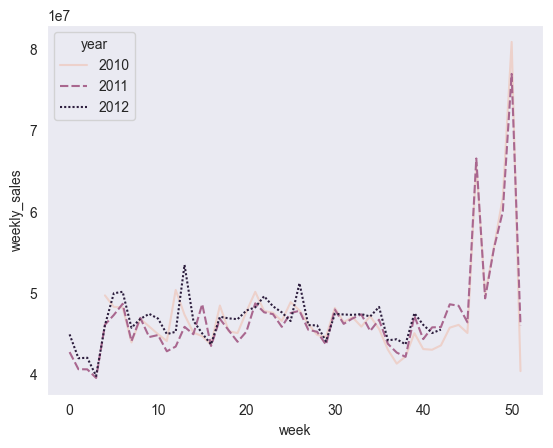

In [10]:
sns.lineplot(data = sales, x = 'week', y = 'weekly_sales', hue='year', style='year')

[Text(0.5, 0, 'weekly'),
 Text(0, 0.5, 'Total Sales'),
 Text(0.5, 1.0, 'Sales by weekly')]

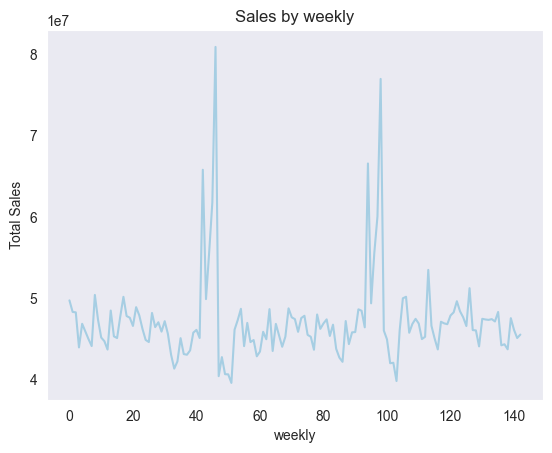

In [11]:
ax = sns.lineplot(data = sales, x ='index', y = 'weekly_sales')
ax.set (xlabel='weekly',
 ylabel='Total Sales',
 title='Sales by weekly')

In [12]:
year_sales = df.groupby('year',as_index=False).agg({'weekly_sales' : 'sum'}).rename(columns={'weekly_sales' : 'sales'}).sort_values('sales', ascending= False)
year_sales

,year,sales
1,2011,2.448200e+09
0,2010,2.288886e+09
2,2012,2.000133e+09


([<matplotlib.patches.Wedge at 0x1bcf2063b90>,
 [Text(-1.0638843194623926, 0.48687796705339015, '2011'),
  Text(0.23023482851811886, -1.0858599926957584, '2010'),
  Text(0.8915667364742031, 0.6612176301436155, '2012')],
 [Text(-0.6092329008887205, 0.2788104597656165, '36.3%'),
  Text(0.12652544630274998, -0.5967338698598311, '34.0%'),
  Text(0.4899600984227602, 0.36337185079964457, '29.7%')])

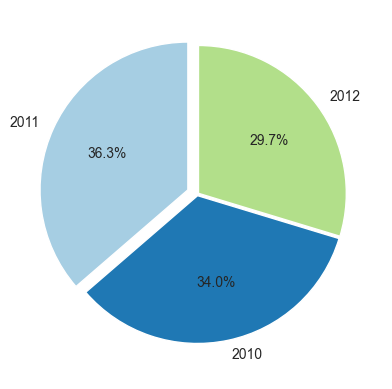

In [13]:
fig, ax = plt.subplots()
expold = (0.07, 0.01, 0.01)
ax.pie(year_sales.sales, labels=year_sales.year, autopct='%1.1f%%', explode=expold ,startangle=90)

<Axes: xlabel='temperature', ylabel='weekly_sales'>

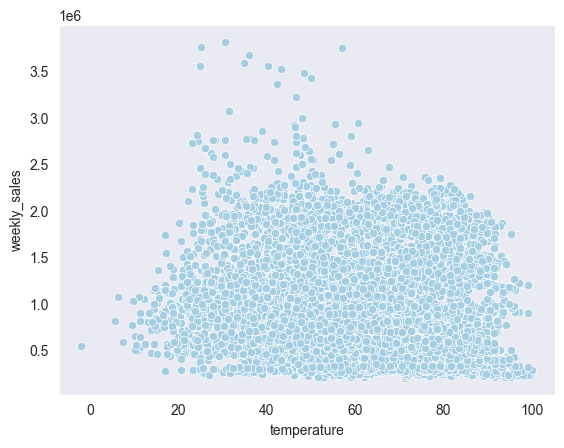

In [16]:
sns.scatterplot(data = df, y= 'weekly_sales', x= 'temperature')

<Axes: xlabel='fuel_price', ylabel='weekly_sales'>

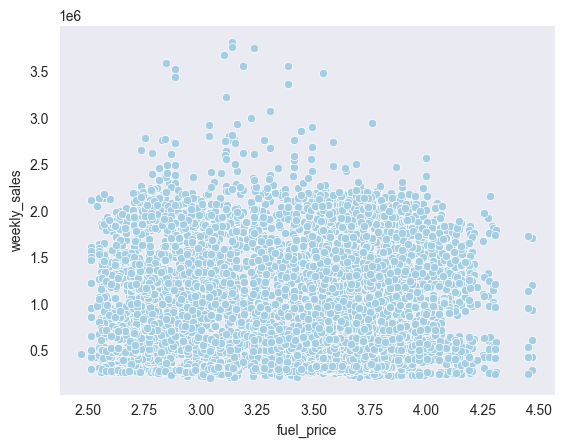

In [17]:
sns.scatterplot(data = df, y= 'weekly_sales', x= 'fuel_price')

In [30]:
mean_holiday = df.query('holiday_flag == 1').weekly_sales.mean().round(2)
mean_another_day = df.query('holiday_flag == 0').weekly_sales.mean().round(2)
count_day_holiday = df.query('holiday_flag == 1').weekly_sales.count()
count_another_day = df.query('holiday_flag == 0').weekly_sales.count()
print(f'mean sales day is holiday {mean_holiday}, count {count_day_holiday} \nmean sales day is not holiday {mean_another_day}, count {count_another_day}')

mean sales day is holiday 1122887.89, count 450 
mean sales day is not holiday 1041256.38, count 5985


In [35]:
holiday_not_holiday = df.groupby(['holiday_flag'],as_index=False).agg({'weekly_sales' : 'mean', 'date' : 'count'}).rename(columns={'weekly_sales' : 'sales', 'date' : 'count'})
holiday_not_holiday

,holiday_flag,sales,count
0,0,1.041256e+06,5985
1,1,1.122888e+06,450


<Axes: xlabel='holiday_flag', ylabel='sales'>

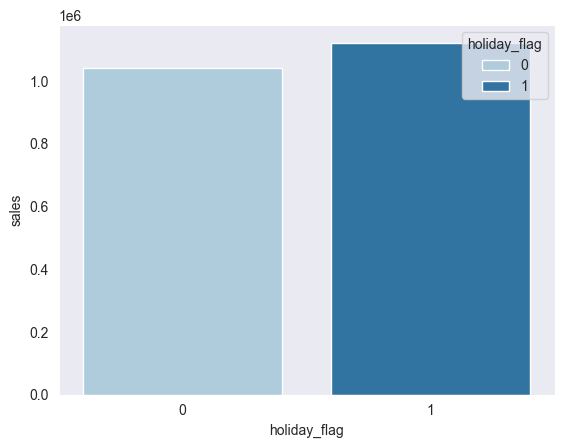

In [37]:
sns.barplot(data = holiday_not_holiday, x='holiday_flag', y = 'sales', hue='holiday_flag')

In [40]:
correlation = df[['weekly_sales' , 'temperature', 'fuel_price']]
correlation.corr()

,weekly_sales,temperature,fuel_price
weekly_sales,1.000000,-0.063810,0.009464
temperature,-0.063810,1.000000,0.144982
fuel_price,0.009464,0.144982,1.000000
